# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = scipy.stats.binom.rvs(10,0.5,size=1000)

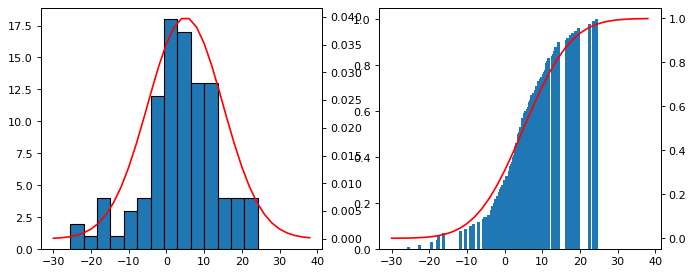

In [4]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=10
datos = scipy.stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


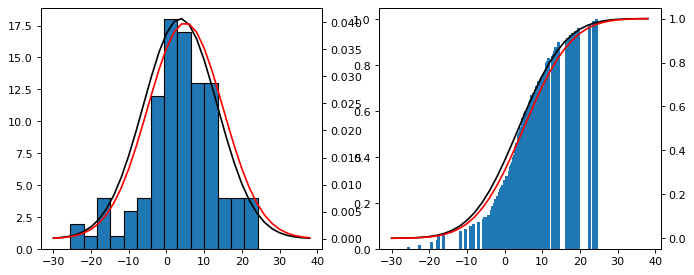

In [5]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [6]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
scipy.stats.kstest(datos, 'norm')

KstestResult(statistic=0.6120348241641618, pvalue=1.5984489825030755e-36)

In [7]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
scipy.stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.0845350699185966, pvalue=0.4479838979850628)

In [8]:
## Respecto de la distribución con los parámetros MV?
scipy.stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.08134887062980362, pvalue=0.4968270226998327)

In [9]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = scipy.stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)

scipy.stats.kstest(datos, datos2)

KstestResult(statistic=0.089, pvalue=0.4468343235506608)

#### Ejercicio1: 
repita el ejercicio con:
(i) una muestra de datos simulados de una v.a. discreta de su elección
(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

In [10]:
## Analizaremos que ocurre con datos reales
vuelos = pd.read_csv('data/formatted_flights.csv.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'data/formatted_flights.csv.txt'

In [ ]:
vuelos.head()

In [ ]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(vuelos['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Agrega texto
plt.title('Histograma de los Retrasos en las llegadas')
plt.xlabel('Retraso(min)'); plt.ylabel('Frecuencia de vuelos');

![distributions_choice.png](data/distributions_choice.png)

In [ ]:
datos1 = vuelos['arr_delay']
datosMin = datos1.min()
print(datosMin)
datos1 = datos1 - datosMin
plt.hist(datos1, color = 'blue', edgecolor = 'black',
         bins = int(180/5))



In [ ]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

ax.hist(datos1, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos1)
print(args)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.draw()

In [ ]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)

scipy.stats.kstest(datos1, datos2)

#### Ejercicio 2:

(i) Aumente el tamaño de la segunda muestra. Cambia el resultado? ¿Por qué?
(ii) Repita el análisis de los datos, considerando por separado los datos de las 5 aerolíneas. Hay diferencias en as distribuciones empíricas, los parámetros estimados y en el ajuste de la distribución de probabilidad? Comente sus resultados.

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.